In [ ]:
# /content/drive/MyDrive/Colab Notebooks/catDogData.zip

In [2]:
!unzip -qq '/content/drive/MyDrive/catDogData.zip' -d '/content/drive/MyDrive'

In [4]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    "/content/drive/MyDrive/validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    "/content/drive/MyDrive/test",
    image_size=(180, 180),
    batch_size=32)


Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [5]:
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:", labels_batch.shape)
    break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


In [6]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    "/content/drive/MyDrive/validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    "/content/drive/MyDrive/test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:", labels_batch.shape)
    break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
32/32 [==============================] - 13s 134ms/step - loss: 0.7406 - accuracy: 0.5130 - val_loss: 0.6918 - val_accuracy: 0.5420
Epoch 2/30
32/32 [==============================] - 4s 105ms/step - loss: 0.6964 - accuracy: 0.5290 - val_loss: 1.3223 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 4s 104ms/step - loss: 0.7029 - accuracy: 0.5550 - val_loss: 0.6969 - val_accuracy: 0.5100
Epoch 4/30
32/32 [==============================] - 4s 104ms/step - loss: 0.7004 - accuracy: 0.5400 - val_loss: 0.6754 - val_accuracy: 0.5840
Epoch 5/30
32/32 [==============================] - 4s 104ms/step - loss: 0.6906 - accuracy: 0.6060 - val_loss: 0.6902 - val_accuracy: 0.5440
Epoch 6/30
32/32 [==============================] - 4s 104ms/step - loss: 0.7023 - accuracy: 0.6160 - val_loss: 0.6512 - val_accuracy: 0.6260
Epoch 7/30
32/32 [==============================] - 4s 103ms/step - loss: 0.6556 - accuracy: 0.6440 - val_loss: 0.7834 - val_accuracy: 0.5940
Epoch

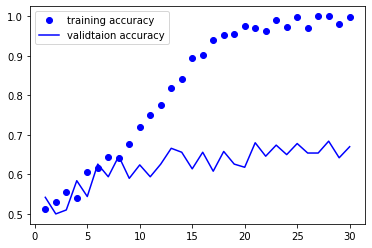

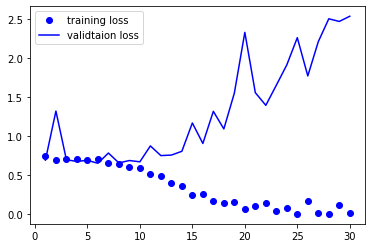

In [11]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, 'bo', label = 'training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'validtaion accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validtaion loss')
plt.legend()


In [13]:
# 평가
test_model = keras.models.load_model('convnet_from_scratch.keras')
test_model.evaluate(test_dataset)

32/32 [==============================] - 3s 55ms/step - loss: 0.6544 - accuracy: 0.6090


[0.6544117331504822, 0.609000027179718]

In [14]:
# 데이터증식
data_generation =  keras.Sequential(
    [
      layers.RandomFlip('horizontal'),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.1) 
    ]
)

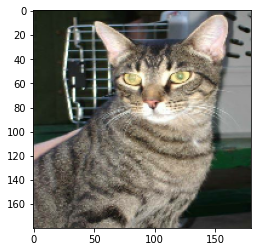

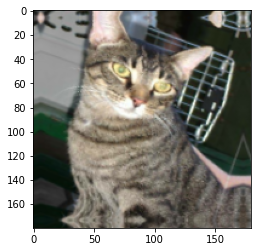

In [24]:
for i,j in train_dataset:  
  generated_image =  data_generation(i[0])    
  plt.imshow(i[0]/255.)
  plt.figure()
  plt.imshow(generated_image/255.)
  break

In [25]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_generation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="generated.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


31/32 [============================>.] - ETA: 0s - loss: 0.6962 - accuracy: 0.4980

32/32 [==============================] - 6s 128ms/step - loss: 0.6961 - accuracy: 0.5000 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 4s 122ms/step - loss: 0.6935 - accuracy: 0.4830 - val_loss: 0.6925 - val_accuracy: 0.5720
Epoch 3/30
32/32 [==============================] - 5s 128ms/step - loss: 0.6892 - accuracy: 0.5770 - val_loss: 0.6896 - val_accuracy: 0.5560
Epoch 4/30
32/32 [==============================] - 4s 121ms/step - loss: 0.6856 - accuracy: 0.5580 - val_loss: 0.6897 - val_accuracy: 0.5500
Epoch 5/30
32/32 [==============================] - 4s 125ms/step - loss: 0.6781 - accuracy: 0.5670 - val_loss: 0.6598 - val_accuracy: 0.6180
Epoch 6/30
32/32 [==============================] - 4s 122ms/step - loss: 0.6572 - accuracy: 0.5900 - val_loss: 0.6825 - val_accuracy: 0.6240
Epoch 7/30
32/32 [==============================] - 4s 123ms/step - loss: 0.6514 - accuracy: 0.6240 - val_loss: 0.6221 - val_accuracy: 0.6520
Epoch 8/30
32/32 

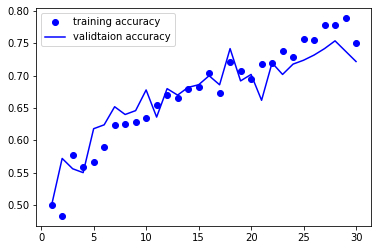

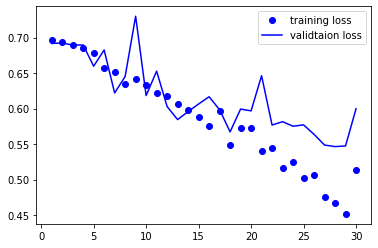

In [26]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, 'bo', label = 'training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'validtaion accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validtaion loss')
plt.legend()

In [31]:
# 평가
test_model = keras.models.load_model('generated.keras')
test_model.evaluate(test_dataset)

ValueError: ignored